In [5]:
import pandas as pd

# Define the file path
file_path = "climate.csv"

# Read the CSV file
climate_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
climate_data.head()


,city,lon,lat,month,monthnum,sunshine
0,Chicago,-87.623177,41.881832,Jan,0,135
1,Chicago,-87.623177,41.881832,Feb,1,136
2,Chicago,-87.623177,41.881832,Mar,2,187
3,Chicago,-87.623177,41.881832,Apr,3,215
4,Chicago,-87.623177,41.881832,May,4,281


In [7]:
import pandas as pd
# Define the file path
file_path = "climate.csv"


# Read the CSV file
climate_data = pd.read_csv(file_path)

# Display 10 random rows from the dataset
random_rows = climate_data.sample(n=10)

# Get the size of the dataset (total number of elements)
dataset_size = climate_data.size

# Get the shape of the dataset (number of rows and columns)
dataset_shape = climate_data.shape

# Display the outputs
print("Random 10 Rows:")
print(random_rows)
print("\nSize of the dataset (total elements):", dataset_size)
print("Shape of the dataset (rows, columns):", dataset_shape)

Random 10 Rows:
             city         lon        lat month  monthnum  sunshine
62        Seattle -122.335167  47.608013   Mar         2       178
31          Miami  -80.191788  25.761681   Aug         7       263
55  San Francisco -122.446747  37.733795   Aug         7       272
45       New York  -73.935242  40.730610   Oct         9       213
39       New York  -73.935242  40.730610   Apr         3       237
19        Houston  -95.358421  29.749907   Aug         7       281
4         Chicago  -87.623177  41.881832   May         4       281
43       New York  -73.935242  40.730610   Aug         7       271
54  San Francisco -122.446747  37.733795   Jul         6       300
24          Miami  -80.191788  25.761681   Jan         0       222

Size of the dataset (total elements): 432
Shape of the dataset (rows, columns): (72, 6)


In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load the data (assuming the climate dataset is available)
file_path = "climate.csv"
climate_data = pd.read_csv(file_path)

# Check for missing values
print("Missing values:\n", climate_data.isnull().sum())

# Convert month column to categorical with a proper order (optional but useful for visuals)
months_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
climate_data['month'] = pd.Categorical(climate_data['month'], categories=months_order, ordered=True)

# Check the data types and ensure they are appropriate
print(climate_data.dtypes)

# If necessary, convert columns to correct data types
climate_data['monthnum'] = pd.to_numeric(climate_data['monthnum'], errors='coerce')  # Ensure numeric
climate_data['sunshine'] = pd.to_numeric(climate_data['sunshine'], errors='coerce')  # Ensure numeric

# Handling any missing or invalid values (you could drop them, fill them, etc.)
climate_data.dropna(inplace=True)  # Dropping rows with missing values

# Basic summary statistics to understand the spread of sunshine hours
print(climate_data.describe())

# Aggregation for potential visualizations:
# 1. Average sunshine per city
city_sunshine_avg = climate_data.groupby('city')['sunshine'].mean().reset_index()

# 2. Average sunshine per month
month_sunshine_avg = climate_data.groupby('month')['sunshine'].mean().reset_index()

# 3. Average sunshine based on latitude and longitude
geo_sunshine_avg = climate_data.groupby(['lat', 'lon'])['sunshine'].mean().reset_index()

# Displaying the transformed dataframes
print("City-wise average sunshine:\n", city_sunshine_avg)
print("Month-wise average sunshine:\n", month_sunshine_avg)
print("Geographical average sunshine:\n", geo_sunshine_avg)


Missing values:
 city        0
lon         0
lat         0
month       0
monthnum    0
sunshine    0
dtype: int64
city          object
lon          float64
lat          float64
month       category
monthnum       int64
sunshine       int64
dtype: object
              lon        lat   monthnum    sunshine
count   72.000000  72.000000  72.000000   72.000000
mean   -96.981757  37.244306   5.500000  219.861111
std     19.258907   7.460586   3.476278   65.514928
min   -122.446747  25.761681   0.000000   52.000000
25%   -122.335167  29.749907   2.750000  176.250000
50%    -91.490799  39.232202   5.500000  224.000000
75%    -80.191788  41.881832   8.250000  271.250000
max    -73.935242  47.608013  11.000000  330.000000
City-wise average sunshine:
             city    sunshine
0        Chicago  208.666667
1        Houston  219.416667
2          Miami  241.916667
3       New York  223.083333
4  San Francisco  245.833333
5        Seattle  180.250000
Month-wise average sunshine:
    month    suns

/tmp/ipykernel_13596/1215321674.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  month_sunshine_avg = climate_data.groupby('month')['sunshine'].mean().reset_index()


In [9]:
# Step 1: Calculate the total average sunshine (all cities, all months)
total_average_sunshine = climate_data['sunshine'].mean()

print("Total Average Sunshine (all cities, all months):", total_average_sunshine)

# Step 2: Create a new DataFrame with the relative sunshine (sunshine of each month in a city minus the total average)
climate_data_relative = climate_data.copy()

# Subtract the total average sunshine from the sunshine column to get the relative sunshine
climate_data_relative['relative_sunshine'] = climate_data_relative['sunshine'] - total_average_sunshine

# Step 3: Display the new DataFrame
print(climate_data_relative[['city', 'month', 'sunshine', 'relative_sunshine']])


Total Average Sunshine (all cities, all months): 219.86111111111111
       city month  sunshine  relative_sunshine
0   Chicago   Jan       135         -84.861111
1   Chicago   Feb       136         -83.861111
2   Chicago   Mar       187         -32.861111
3   Chicago   Apr       215          -4.861111
4   Chicago   May       281          61.138889
..      ...   ...       ...                ...
67  Seattle   Aug       281          61.138889
68  Seattle   Sep       221           1.138889
69  Seattle   Oct       142         -77.861111
70  Seattle   Nov        72        -147.861111
71  Seattle   Dec        52        -167.861111

[72 rows x 4 columns]


In [12]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming climate_data_relative is already defined as per your previous steps
# Ensure the 'month' column is ordered correctly for plotting
months_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
climate_data_relative['month'] = pd.Categorical(
    climate_data_relative['month'], categories=months_order, ordered=True)

# Set the style for seaborn
sns.set(style="whitegrid")


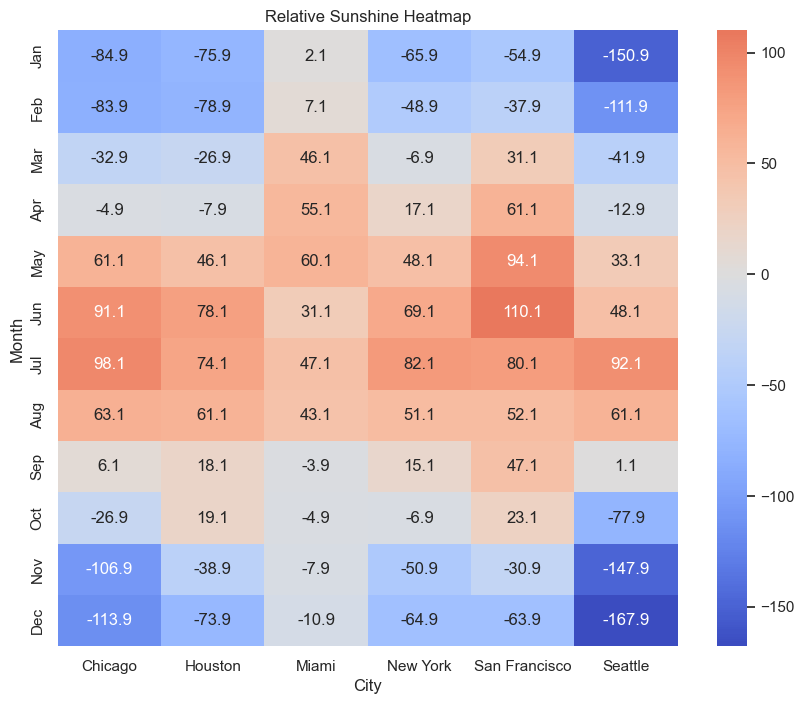

In [15]:
# Pivot the data for heatmap
heatmap_data = climate_data_relative.pivot(index="month", columns="city", values="relative_sunshine")

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="coolwarm", center=0)

plt.title('Relative Sunshine Heatmap')
plt.xlabel('City')
plt.ylabel('Month')
plt.show()


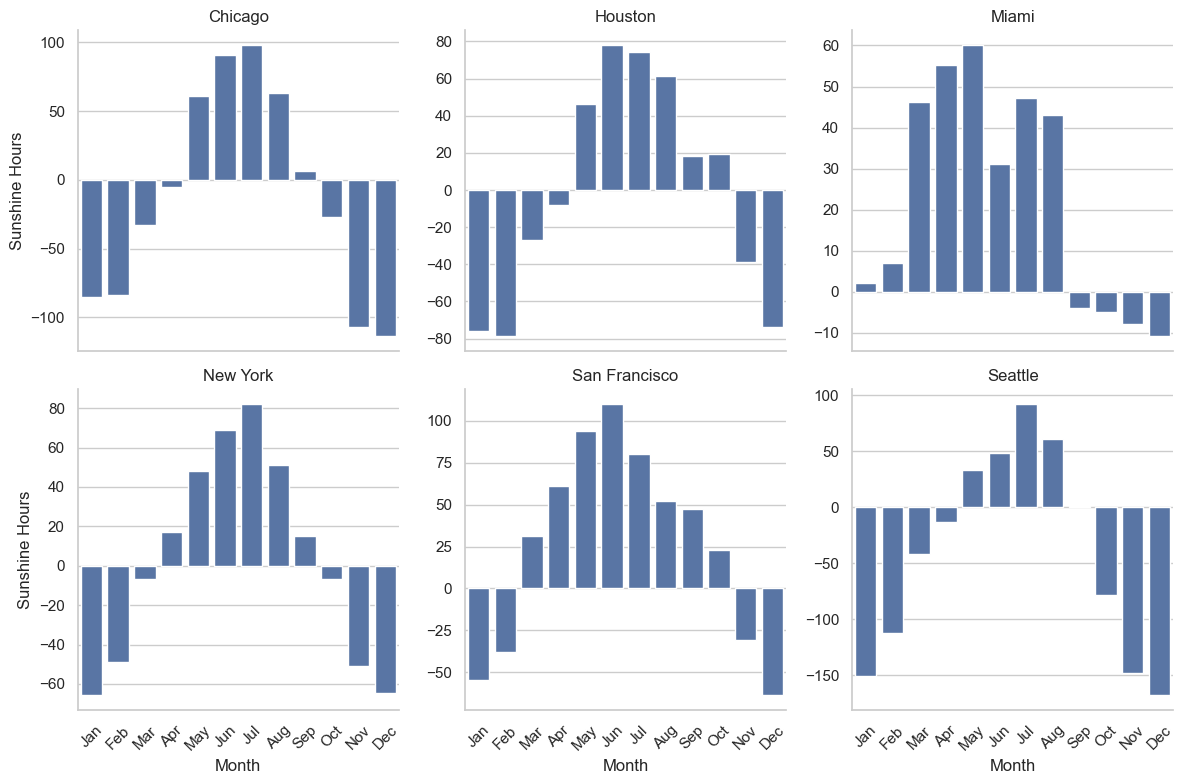

In [19]:
# Facet grid
g = sns.FacetGrid(climate_data_relative, col="city", col_wrap=3, height=4, sharey=False)
g.map_dataframe(sns.barplot, x="month", y="relative_sunshine", order=months_order)

g.set_titles("{col_name}")
g.set_axis_labels("Month", "Sunshine Hours")
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
plt.tight_layout()
plt.show()


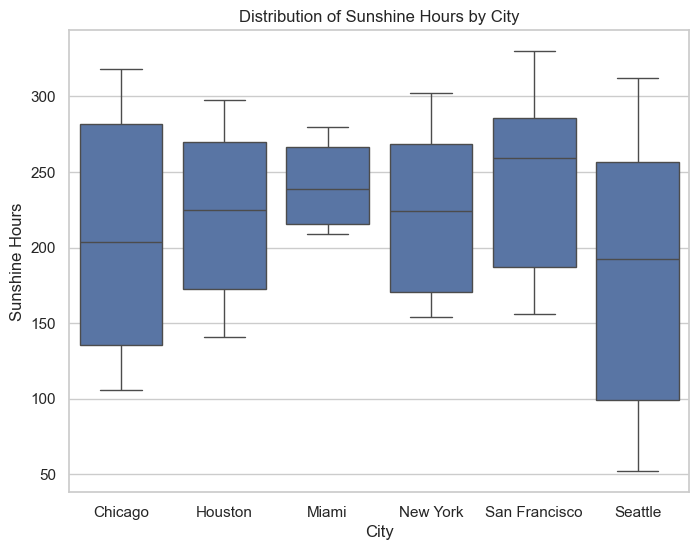

In [17]:
# Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=climate_data_relative, x='city', y='sunshine')

plt.title('Distribution of Sunshine Hours by City')
plt.xlabel('City')
plt.ylabel('Sunshine Hours')
plt.show()


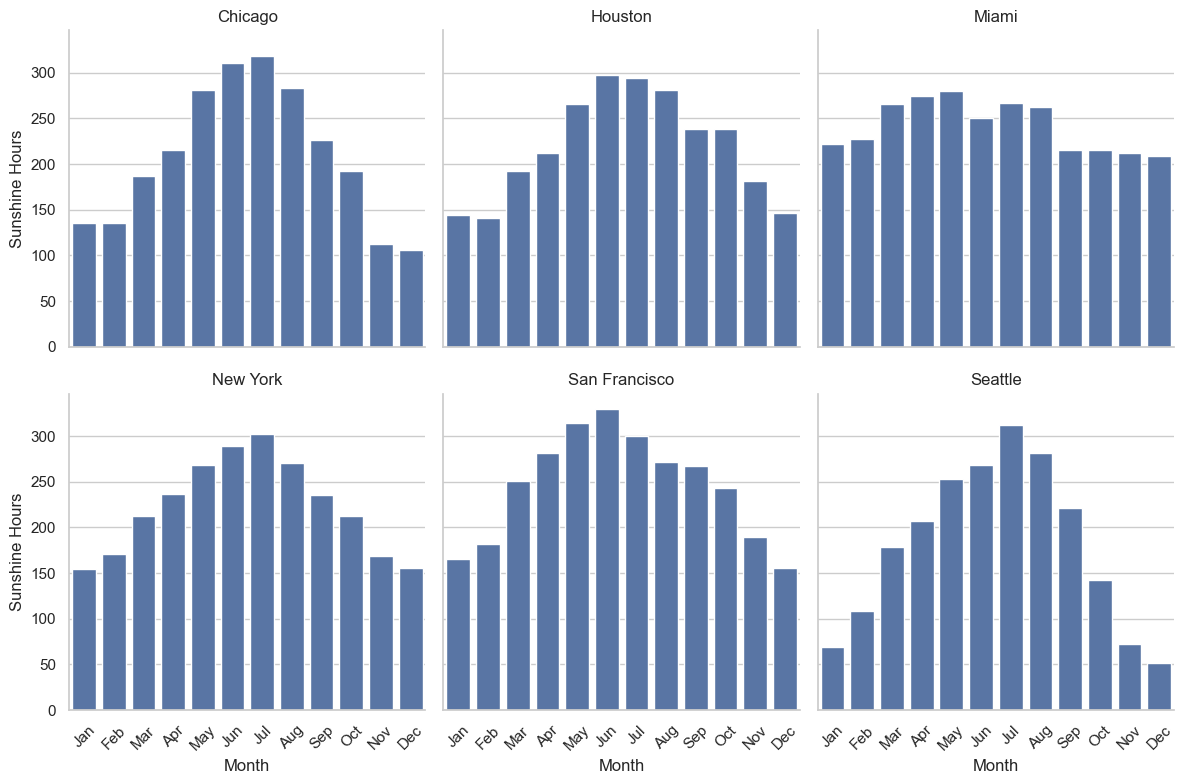

In [18]:
# Facet grid
g = sns.FacetGrid(climate_data_relative, col="city", col_wrap=3, height=4)
g.map_dataframe(sns.barplot, x="month", y="sunshine", order=months_order)

g.set_titles("{col_name}")
g.set_axis_labels("Month", "Sunshine Hours")
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
plt.tight_layout()
plt.show()


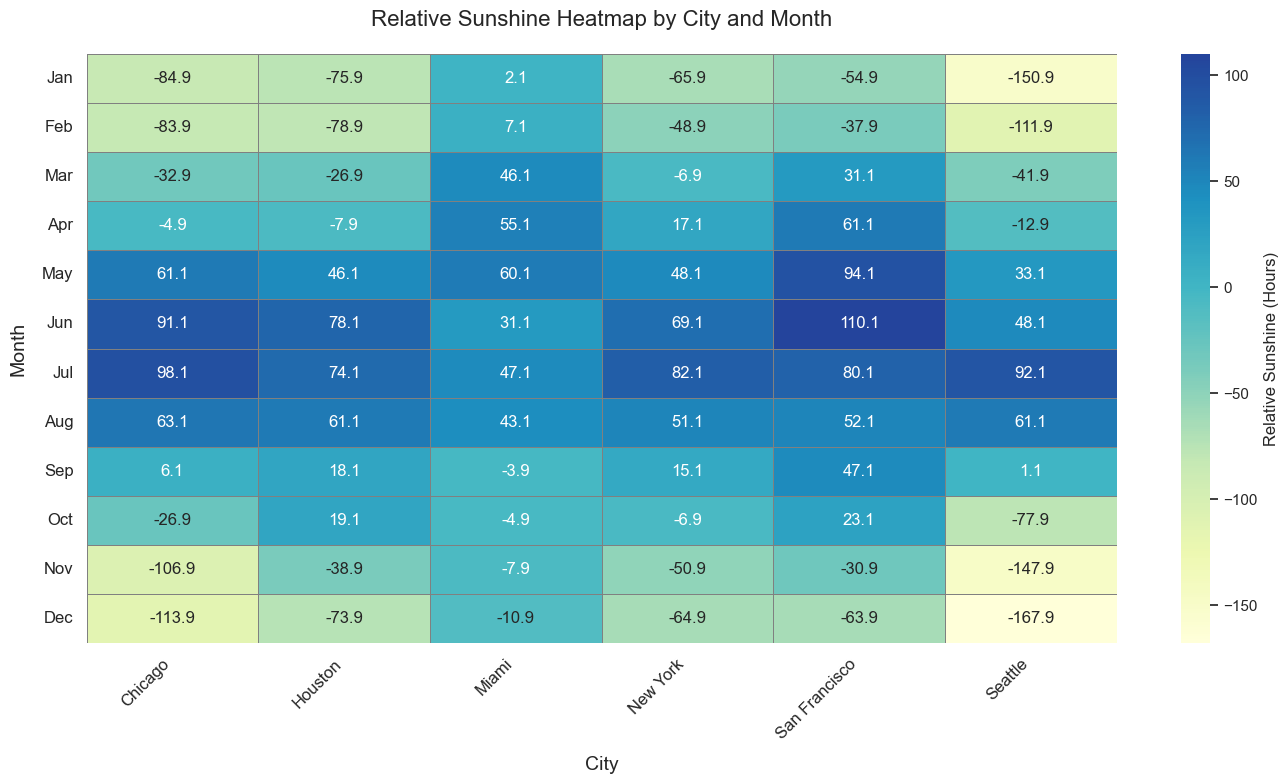

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Define the order of months for proper sequencing in the heatmap
months_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Convert 'month' column to a categorical type to maintain order
climate_data_relative['month'] = pd.Categorical(
    climate_data_relative['month'], categories=months_order, ordered=True)

# Pivot the DataFrame
heatmap_data = climate_data_relative.pivot(
    index='month', 
    columns='city', 
    values='relative_sunshine'
)


# Set the visual style
sns.set(style="whitegrid")

# Initialize the matplotlib figure
plt.figure(figsize=(14, 8))

# Create the heatmap
heatmap = sns.heatmap(
    heatmap_data, 
    annot=True,            # Display the relative sunshine values in the cells
    fmt=".1f",             # Format the annotations to one decimal place
    cmap="YlGnBu",         # Choose a color palette (you can experiment with others like "coolwarm")
    linewidths=.5,         # Add lines between cells for clarity
    linecolor='gray', 
    cbar_kws={'label': 'Relative Sunshine (Hours)'},
    center=0               # Center the colormap at 0 to differentiate positive and negative values
)

# Customize the axes and title
plt.title('Relative Sunshine Heatmap by City and Month', fontsize=16, pad=20)
plt.xlabel('City', fontsize=14, labelpad=10)
plt.ylabel('Month', fontsize=14, labelpad=10)

# Improve tick label visibility
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# Display the heatmap
plt.tight_layout()
plt.show()


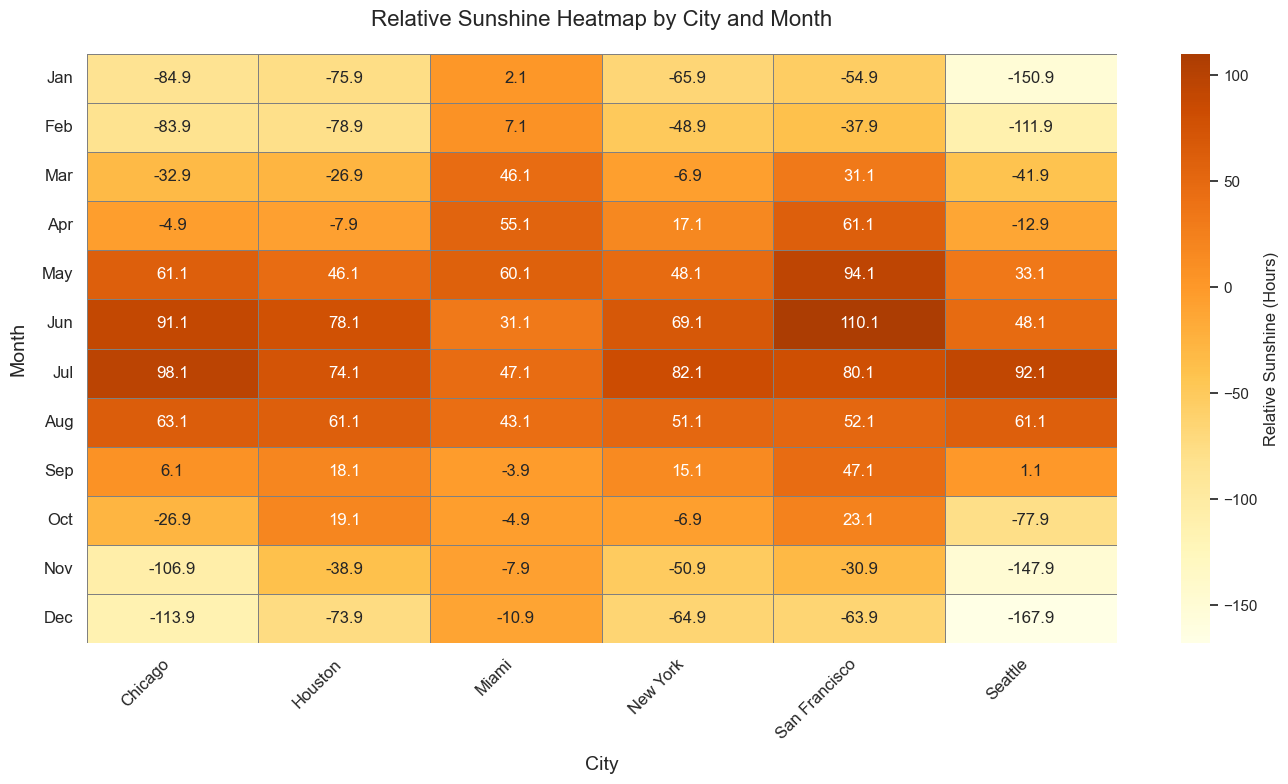

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming climate_data_relative is already defined

# Define the order of months
months_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Convert 'month' to categorical
climate_data_relative['month'] = pd.Categorical(
    climate_data_relative['month'], categories=months_order, ordered=True)

# Pivot the DataFrame
heatmap_data = climate_data_relative.pivot(
    index='month', 
    columns='city', 
    values='relative_sunshine'
)

# Set the visual style
sns.set(style="whitegrid")

# Initialize the matplotlib figure
plt.figure(figsize=(14, 8))

# Create the heatmap with the new colormap
heatmap = sns.heatmap(
    heatmap_data, 
    annot=True, 
    fmt=".1f", 
    cmap="YlOrBr",          # Updated colormap
    linewidths=.5, 
    linecolor='gray', 
    cbar_kws={'label': 'Relative Sunshine (Hours)'},
    center=0
)

# Customize the axes and title
plt.title('Relative Sunshine Heatmap by City and Month', fontsize=16, pad=20)
plt.xlabel('City', fontsize=14, labelpad=10)
plt.ylabel('Month', fontsize=14, labelpad=10)

# Improve tick label visibility
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# Display the heatmap
plt.tight_layout()
plt.show()


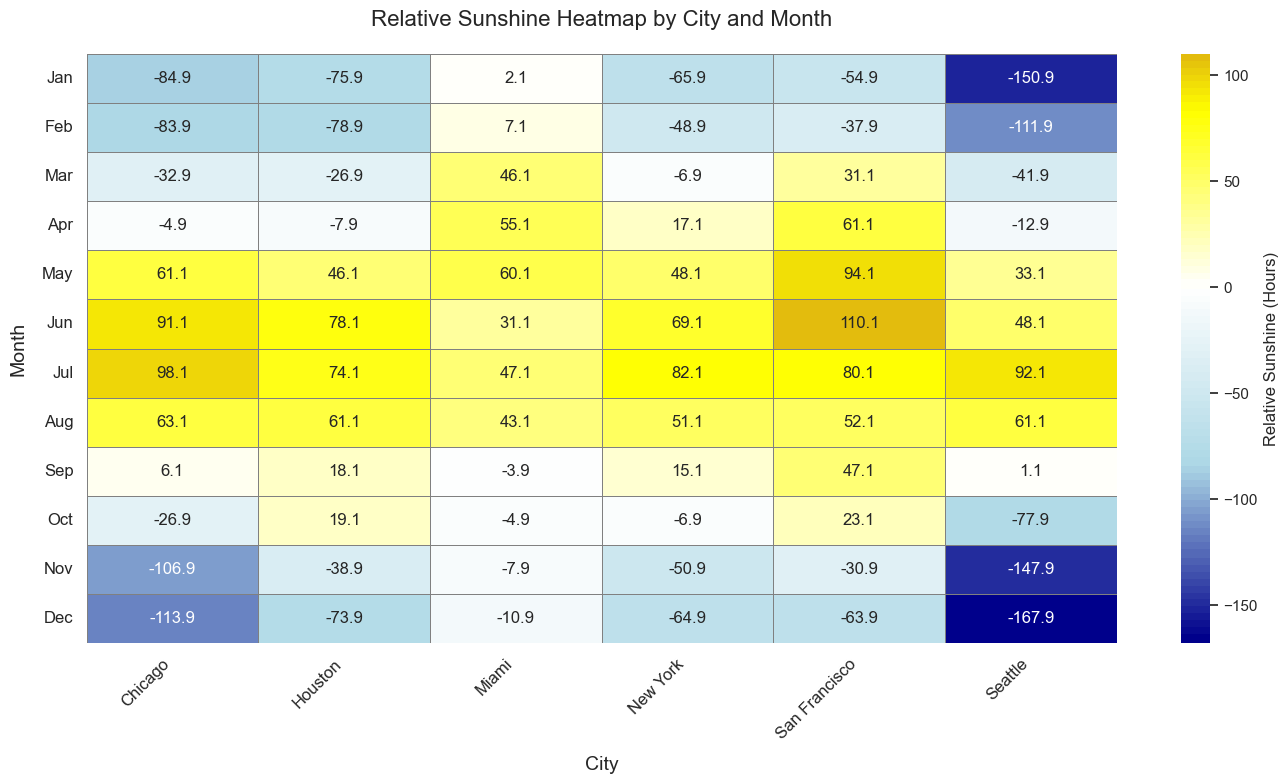

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

# Assuming climate_data_relative is already defined

# Define the order of months
months_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Convert 'month' to categorical
climate_data_relative['month'] = pd.Categorical(
    climate_data_relative['month'], categories=months_order, ordered=True)

# Pivot the DataFrame
heatmap_data = climate_data_relative.pivot(
    index='month', 
    columns='city', 
    values='relative_sunshine'
)

# Set the visual style
sns.set(style="whitegrid")

# Create a custom colormap
colors = ['darkblue', 'lightblue', 'white', 'yellow', 'brown']
n_bins = 100
cmap = mcolors.LinearSegmentedColormap.from_list('custom', colors, N=n_bins)

# Initialize the matplotlib figure
plt.figure(figsize=(14, 8))

# Create the heatmap with the new colormap
heatmap = sns.heatmap(
    heatmap_data, 
    annot=True, 
    fmt=".1f", 
    cmap=cmap,  # Use the custom colormap
    linewidths=.5, 
    linecolor='gray', 
    cbar_kws={'label': 'Relative Sunshine (Hours)'},
    center=0
)

# Customize the axes and title
plt.title('Relative Sunshine Heatmap by City and Month', fontsize=16, pad=20)
plt.xlabel('City', fontsize=14, labelpad=10)
plt.ylabel('Month', fontsize=14, labelpad=10)

# Improve tick label visibility
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# Display the heatmap
plt.tight_layout()
plt.show()